In [28]:
"""
cerate on 2020.5.14
by ljz to 2DQPCA_addthreshold
"""
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer,BasicAer,IBMQ,QuantumRegister,ClassicalRegister
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-05-15 08:08:27,453: Credentials are already in use. The existing account in the session will be replaced.


In [29]:
import numpy as np
A = np.array([[2.5,0.5],[0.5,2.5]])
lambda1,vector1 = np.linalg.eig(A)
u1 = vector1[:,0]
u2 = vector1[:,1]
v1 = lambda1[0]
v2 = lambda1[1]
print("lambda=",lambda1)
print("v1=",v1)
print("v2=",v2)
print("vector=",vector1)
print("u1=",u1)
print("u2=",u2)

psi = (np.kron(u1,u1)*v1+np.kron(u2,u2)*v2)/(np.sqrt(v1*v1+v2*v2))
print("psi=",psi)

lambda= [3. 2.]
v1= 3.0
v2= 2.0
vector= [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
u1= [0.70710678 0.70710678]
u2= [-0.70710678  0.70710678]
psi= [0.69337525 0.13867505 0.13867505 0.69337525]


In [30]:
q = QuantumRegister(5)
c = ClassicalRegister(5)
qc = QuantumCircuit(q,c)

#initial q[0]
# qc.initialize(psi,[q[3],q[4]])
# qc.barrier(q[0],q[1],q[2],q[3],q[4])
qc.h(q[3])
qc.x(q[3])
qc.cu3(0.3948,0,0,q[3],q[4])
qc.x(q[3])
qc.cu3(2.7468,0,0,q[3],q[4])
qc.barrier (q[0],q[1],q[2],q[3],q[4])

In [31]:
#phase estimation
import math
qc.h(q[1])
qc.h(q[2])
# qc.cu3(math.pi/2,-3*math.pi/2,-math.pi/2,q[2],q[3])
# qc.cu3(math.pi,math.pi/2,-math.pi/2,q[1],q[3])
qc.cu3(-math.pi/2,-math.pi/2,math.pi/2,q[2],q[3])
qc.u1(5*math.pi/4,q[2]);
qc.cx(q[1],q[3])
qc.u1(math.pi,q[1])
qc.swap(q[1],q[2])
qc.h(q[2])
qc.cu1(-math.pi/2,q[1],q[2])
qc.h(q[1])
qc.barrier(q[0],q[1],q[2],q[3],q[4])

In [32]:
#transformation y_k
qc.x(q[2])
qc.cx(q[2],q[1])
# qc.x(q[2])
qc.barrier(q[0],q[1],q[2],q[3],q[4])

In [33]:
#Anc qubit cont operation
qc.x(q[1])
qc.x(q[2])
qc.ccx(q[1],q[2],q[0])
qc.x(q[1])
qc.x(q[2])
qc.x(q[0])
qc.barrier(q[0],q[1],q[2],q[3],q[4])

In [34]:
#Reverse operation

# cnot = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
# cnot_ = np.linalg.inv(cnot)
# print(cnot_)cnot=cnot_

#reverse y_k
# qc.x(q[2])
qc.cx(q[2],q[1])
qc.x(q[2])
qc.barrier(q[0],q[1],q[2],q[3],q[4])
#reverse phase estimation
qc.h(q[1])
qc.cu1(math.pi/2,q[1],q[2])
qc.h(q[2])
qc.swap(q[1],q[2])
qc.u1(-math.pi,q[1])
qc.cx(q[1],q[3])
qc.u1(-5*math.pi/4,q[2]);
qc.cu3(-math.pi/2,math.pi/2,-math.pi/2,q[2],q[3])
# qc.cu3(math.pi,math.pi/2,-math.pi/2,q[1],q[3])
# qc.cu3(math.pi/2,3*math.pi/2,math.pi/2,q[2],q[3])
qc.h(q[1])
qc.h(q[2])
qc.barrier(q[0],q[1],q[2],q[3],q[4])

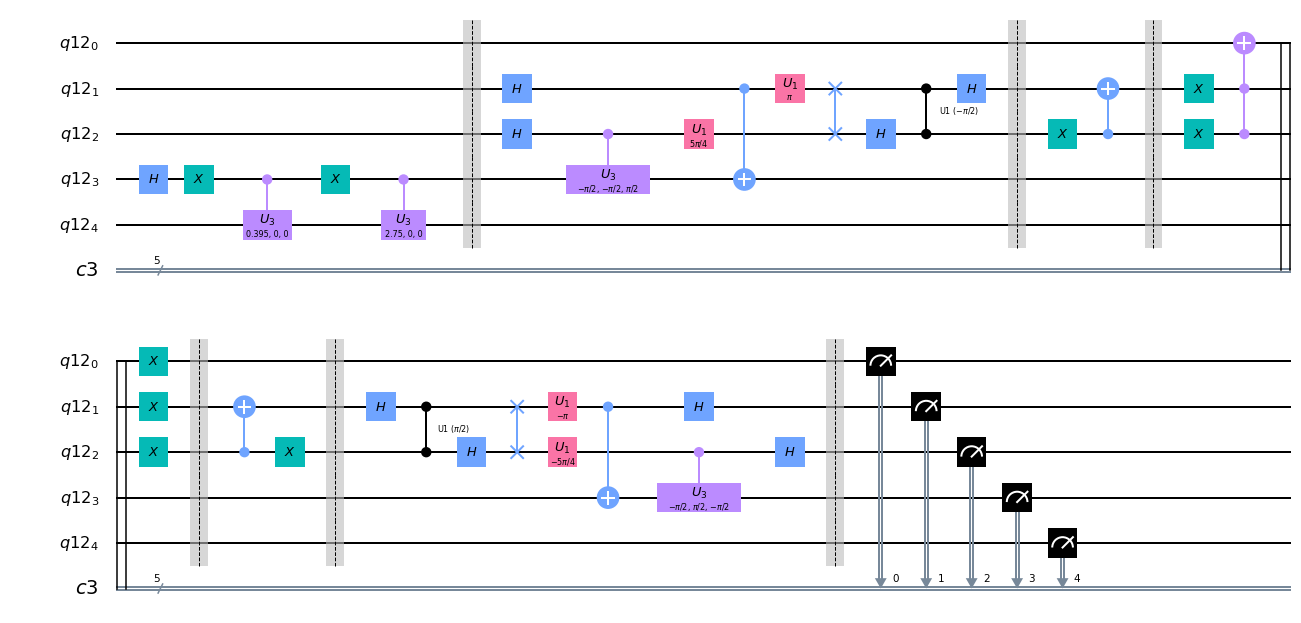

In [35]:
qc.measure(q[0],c[0])
qc.measure(q[1],c[1])
qc.measure(q[2],c[2])
qc.measure(q[3],c[3])
qc.measure(q[4],c[4])
qc.draw(output='mpl')

In [36]:
backend_qasm=BasicAer.get_backend('qasm_simulator')
job_qasm=execute(qc,backend_qasm,shots=1024)
result_qasm=job_qasm.result()
counts=result_qasm.get_counts(qc)
print(counts)

sim_jobID=job_qasm.job_id()
print('SIMULATION JOB ID: {}'.format(sim_jobID))

{'01001': 22, '10001': 25, '00001': 495, '11001': 482}
SIMULATION JOB ID: a6b6fe88-4eb7-4823-a126-e5fda5b4a512


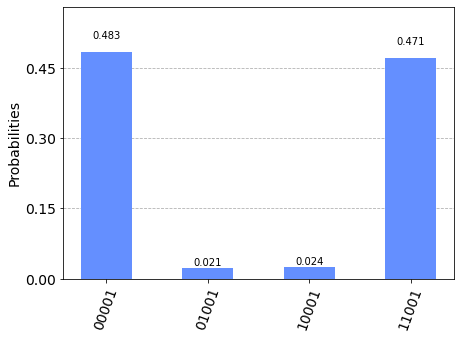

In [37]:
plot_histogram(counts)

In [38]:
import numpy as np
A = np.array([[2.5,0.5],[0.5,2.5]])
lambda1,vector1 = np.linalg.eig(A)
u1 = vector1[:,0]
u2 = vector1[:,1]
v1 = lambda1[0]
v2 = lambda1[1]
print("lambda=",lambda1)
print("v1=",v1)
print("v2=",v2)
print("vector=",vector1)
print("u1=",u1)
print("u2=",u2)

psi = (np.kron(u1,u1)*v1)/(np.sqrt(v1*v1))
print("psi=",psi)

lambda= [3. 2.]
v1= 3.0
v2= 2.0
vector= [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
u1= [0.70710678 0.70710678]
u2= [-0.70710678  0.70710678]
psi= [0.5 0.5 0.5 0.5]
